In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
out=np.array([10,110,5,120])
data=np.concatenate([data,out])
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [ ]:
***Using Scatterplot***

**<ins>A scatter plot</ins>**

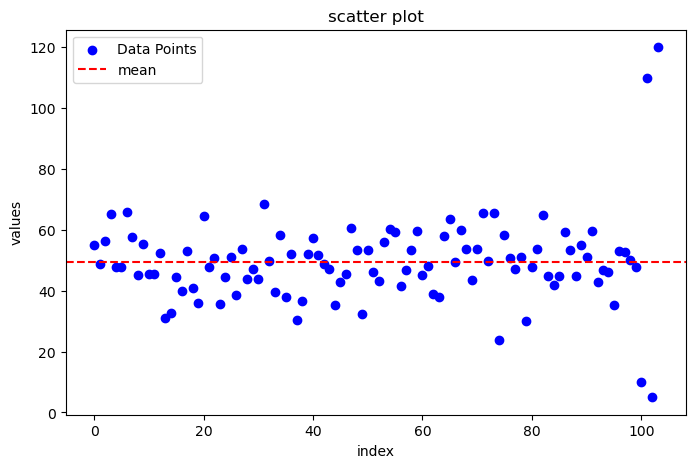

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='mean')
plt.xlabel('index')
plt.ylabel('values')
plt.title('scatter plot')
plt.legend()
plt.show()

In [ ]:
***Using Box plot***

**<ins>A box plot</ins>**

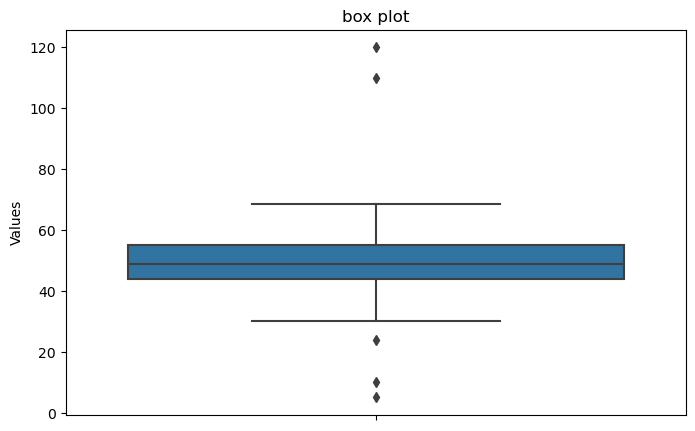

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title('box plot')
plt.show()

***Z score***
**<ins>
z= X−μ/σ


 
Where:


z = z-score

X = value

μ = mean of the population or sample

σ = standard deviation of the population or sample 
</ins>**

In [11]:
df['Z score']=zscore(df['Values'])
df['Out_z']=df['Z score'].apply(lambda x:'Outlier' if abs(x) >3 else 'Normal')
print(df[df['Out_z'] == 'Outlier'])

     Values   Z score    Out_z
101   110.0  4.328173  Outlier
102     5.0 -3.175368  Outlier
103   120.0  5.042796  Outlier


**<ins>IQR=Q3−Q1

Where:


Q1 is the first quartile (25th percentile)

Q3 is the third quartile (75th percentile)</ins>**

**<ins>Lower Bound = Q1−1.5×IQR

Upper Bound = Q3+1.5×IQR</ins>**

In [13]:
q1=df['Values'].quantile(0.25)
q3=df['Values'].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
up=q3+1.5*iqr
df['out']=df['Values'].apply(lambda x:'Outlier' if (x < low or x > up) else 'Normal')
print(df[df['out'] == 'Outlier'])

         Values   Z score    Out_z      out
74    23.802549 -1.831694   Normal  Outlier
100   10.000000 -2.818056   Normal  Outlier
101  110.000000  4.328173  Outlier  Outlier
102    5.000000 -3.175368  Outlier  Outlier
103  120.000000  5.042796  Outlier  Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**




In [14]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
out=np.array([10,110,5,120])
data=np.concatenate([data,out])
q1=np.percentile(data,25)
q2=np.median(data)
q3=np.percentile(data,75)
minval=np.min(data)
maxval=np.max(data)
low=q1-1.5*iqr
up=q2+1.5*iqr
outliers=data[(data < low) | (data > up)]
print(f'Number summary:\nMin:{minval},q1:{q1},median {q2}:{q2},q3:{q3},max:{maxval}')
print(f'iqr:{iqr}')
print(f'lower bound:{low},upper bound :{up}')
print(f'outliers:{outliers}')

Number summary:
Min:5.0,q1:43.874401021766715,median 48.73043708220287:48.73043708220287,q3:55.00852473036764,max:120.0
iqr:11.134123708600924
lower bound:27.17321545886533,upper bound :65.43162264510426
outliers:[ 65.79212816  68.52278185  65.64643656  23.80254896  10.
 110.           5.         120.        ]
